In [15]:
import tensorflow as tf
import pandas as pd

from FeedBack import FeedBack
from window import WindowGenerator
from utils import train_test_val_split

# Autoregressive (AR) LSTM

## Dataset

In [16]:
case_1 = pd.read_csv("datasets/case_1.csv")
case_2 = pd.read_csv("datasets/case_2.csv")
case_3 = pd.read_csv("datasets/case_3.csv")
case_4 = pd.read_csv("datasets/case_4.csv")
case_5 = pd.read_csv("datasets/case_5.csv")

In [17]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets
feature_count = len(case_1.columns)

In [18]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

## Train case function

In [19]:
def train_case(case_df:pd.DataFrame, model:FeedBack, in_width:int, out_steps:int, max_epochs:int):
    """ Train model for given case df. """

    outlets = [ col for col in case_df.columns.values if col.startswith('outlet') ]
    column_indices = { name: i for i, name in enumerate(case_df.columns) }

    train_df, test_df, val_df = train_test_val_split(case_df)
    # train_df, test_df, val_df = normalize_datasets(train_df, test_df, val_df)

    label_columns = outlets

    multi_window = WindowGenerator(
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        input_width=in_width,
        label_width=out_steps,
        shift=out_steps,
        # label_columns=label_columns
    )

    history = model.fit(
        multi_window.train,
        epochs=max_epochs,
        validation_data=multi_window.val,
        verbose=0
        # callbacks=[early_stopping]
    )

    return multi_window, history

## Model creation

In [20]:
IN_WIDTH = 8
OUT_STEPS = 8
MAX_EPOCHS = 20
features_size = len(label_columns)

In [21]:
feedback_model = FeedBack(units=32, out_steps=OUT_STEPS, num_features=feature_count)

In [22]:
feedback_model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.RootMeanSquaredError()])

## Case 1

In [23]:
window, history = train_case(
    case_df=case_1,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

2022-08-18 13:19:24.253636: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-18 13:19:25.168885: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 13:19:26.636838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [24]:
feedback_model.build(input_shape=window.example[0].shape)
feedback_model.summary()

Model: "feed_back_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_cell_1 (LSTMCell)      multiple                  39040     
                                                                 
 rnn_1 (RNN)                 multiple                  39040     
                                                                 
 dense_1 (Dense)             multiple                  8976      
                                                                 
Total params: 48,016
Trainable params: 48,016
Non-trainable params: 0
_________________________________________________________________


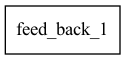

In [46]:
tf.keras.utils.plot_model(feedback_model, "models/feedback_model.png", show_shapes=True)

2022-08-18 13:19:37.365051: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


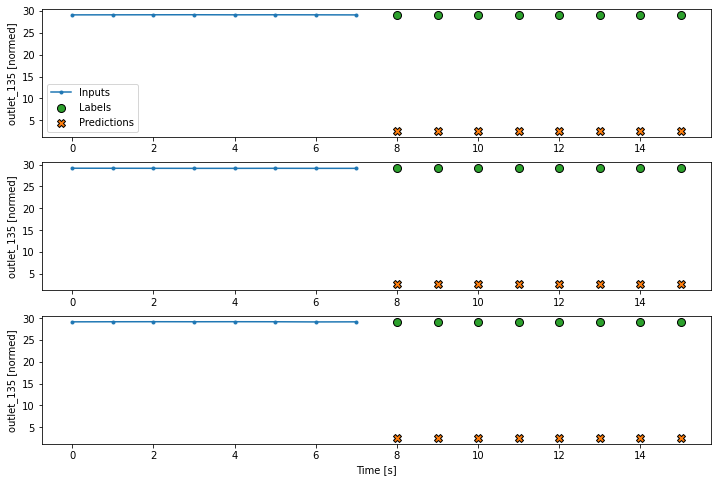

In [25]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'RMSE'}, xlabel='Epoch', ylabel='RMSE'>

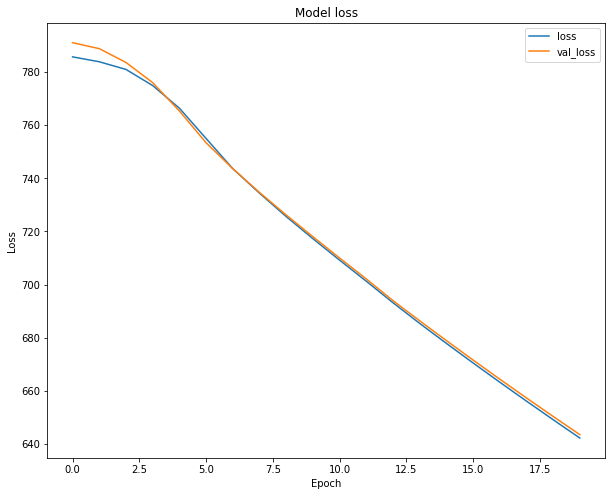

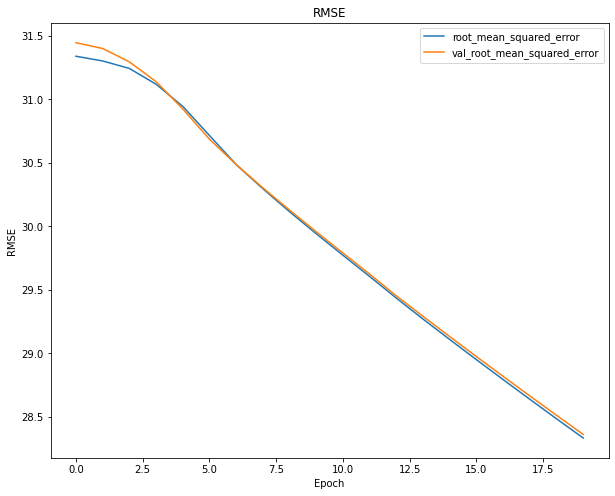

In [27]:
losses = pd.DataFrame(history.history)

losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")
losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")

In [28]:
feedback_model.evaluate(window.test)

1/1 [==============================] - 0s 114ms/step - loss: 643.0019 - root_mean_squared_error: 28.3479


[643.0018920898438, 28.347900390625]

In [29]:
feedback_model.summary()

Model: "feed_back_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_cell_1 (LSTMCell)      multiple                  39040     
                                                                 
 rnn_1 (RNN)                 multiple                  39040     
                                                                 
 dense_1 (Dense)             multiple                  8976      
                                                                 
Total params: 48,016
Trainable params: 48,016
Non-trainable params: 0
_________________________________________________________________


## Case 2

In [30]:
window, history = train_case(
    case_df=case_2,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

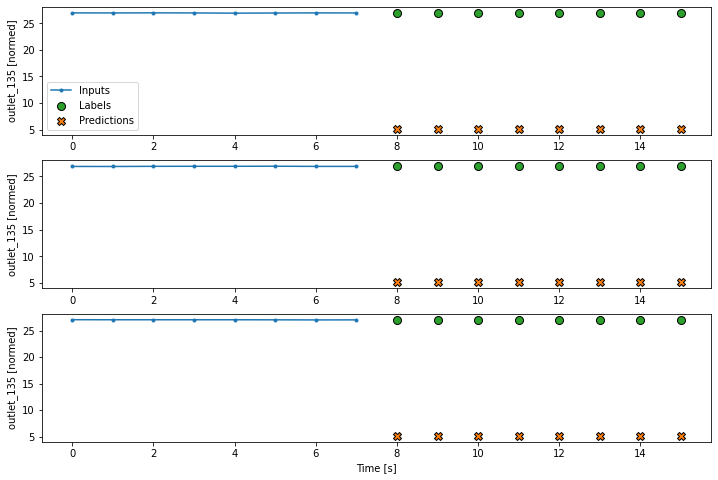

In [31]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

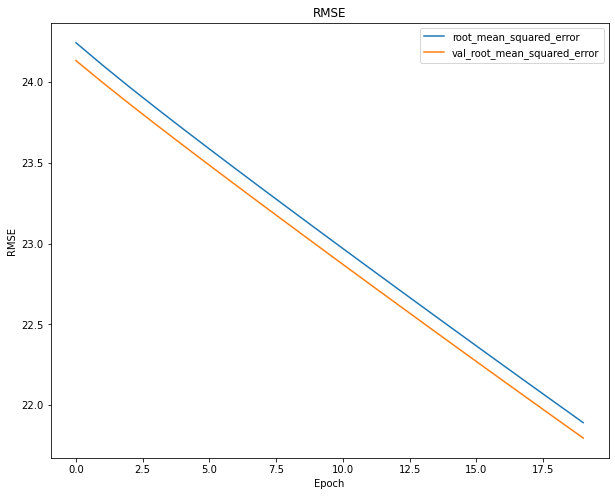

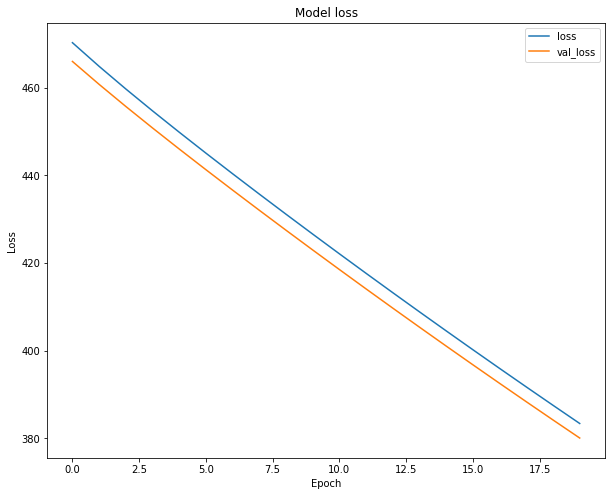

In [32]:
losses = pd.DataFrame(history.history)

losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [33]:
feedback_model.evaluate(window.test)

1/1 [==============================] - 0s 118ms/step - loss: 382.7633 - root_mean_squared_error: 21.8750


[382.7632751464844, 21.874971389770508]

## Case 3

In [34]:
window, history = train_case(
    case_df=case_3,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

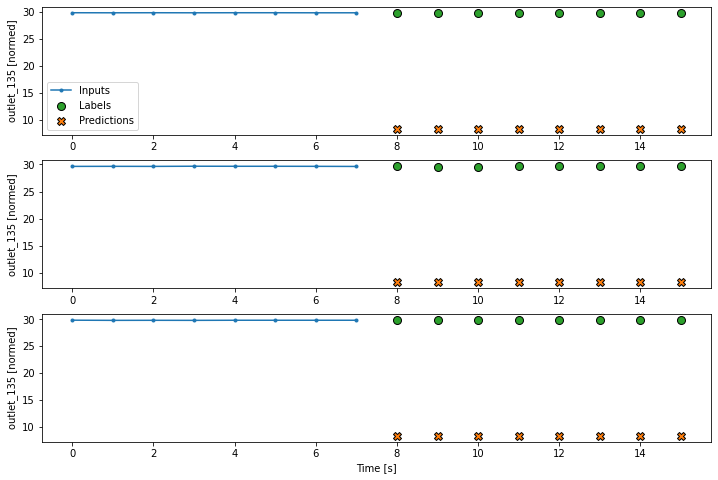

In [35]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

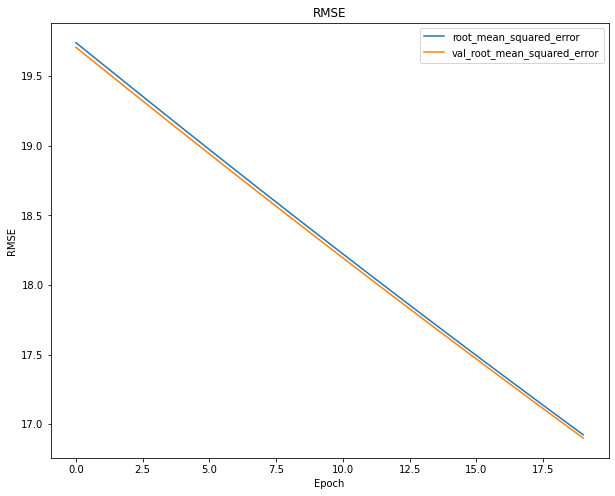

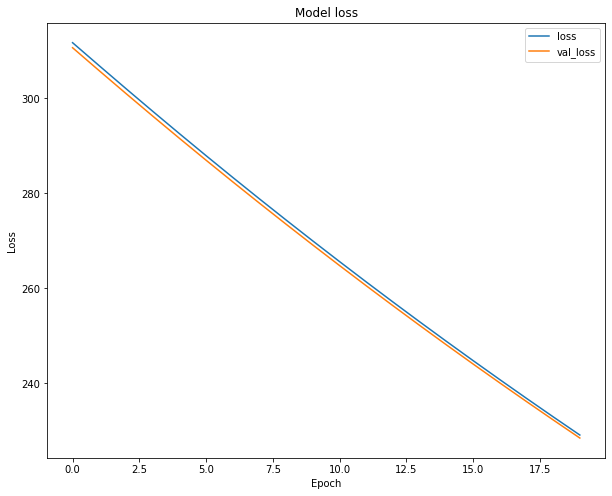

In [36]:
losses = pd.DataFrame(history.history)

losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [37]:
feedback_model.evaluate(window.test)

1/1 [==============================] - 0s 133ms/step - loss: 227.6892 - root_mean_squared_error: 16.8653


[227.6891632080078, 16.865346908569336]

## Case 4

In [38]:
window, history = train_case(
    case_df=case_4,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

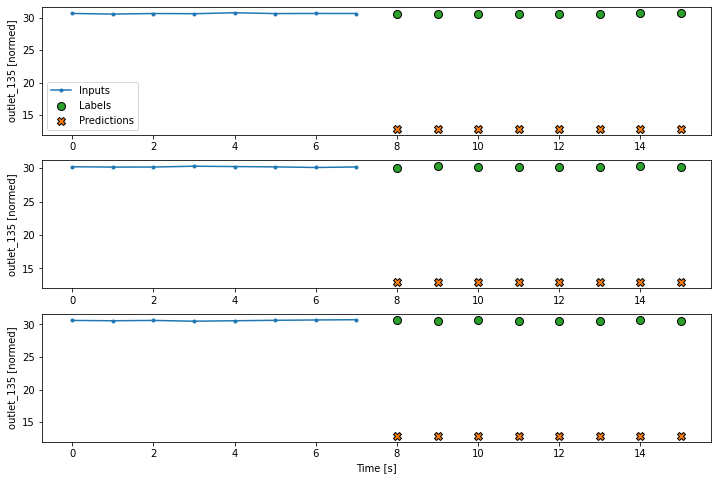

In [39]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

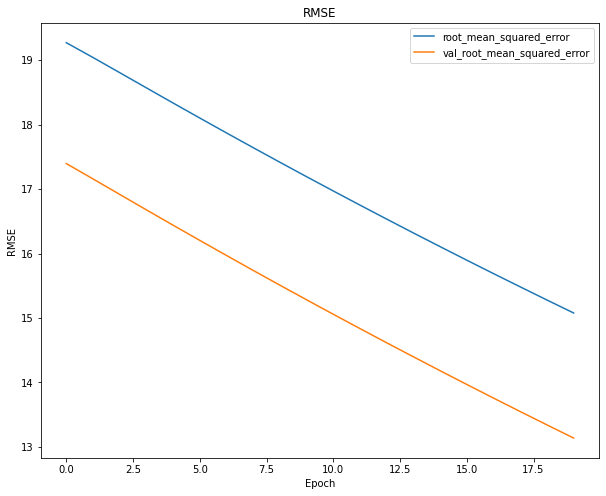

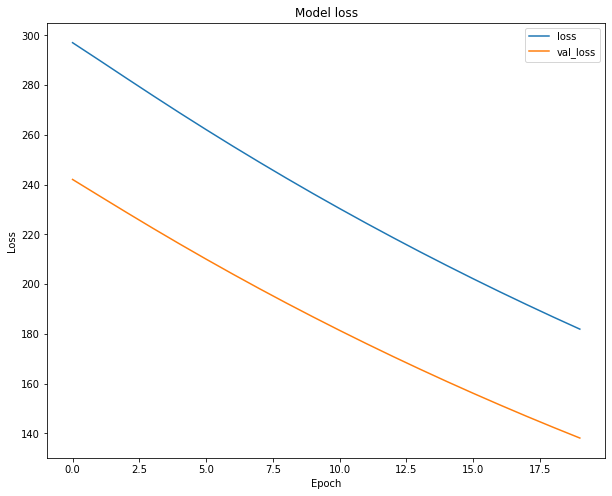

In [40]:
losses = pd.DataFrame(history.history)

losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [41]:
feedback_model.evaluate(window.test)

1/1 [==============================] - 0s 138ms/step - loss: 138.7830 - root_mean_squared_error: 13.1717


[138.782958984375, 13.171662330627441]

## Case 5

In [42]:
window, history = train_case(
    case_df=case_5,
    model=feedback_model,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS
)

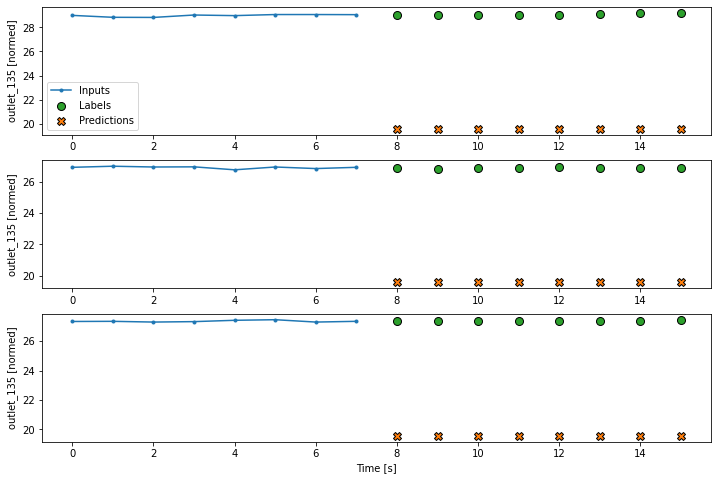

In [43]:
window.plot(feedback_model, plot_col="outlet_135")

<AxesSubplot:title={'center':'Model loss'}, xlabel='Epoch', ylabel='Loss'>

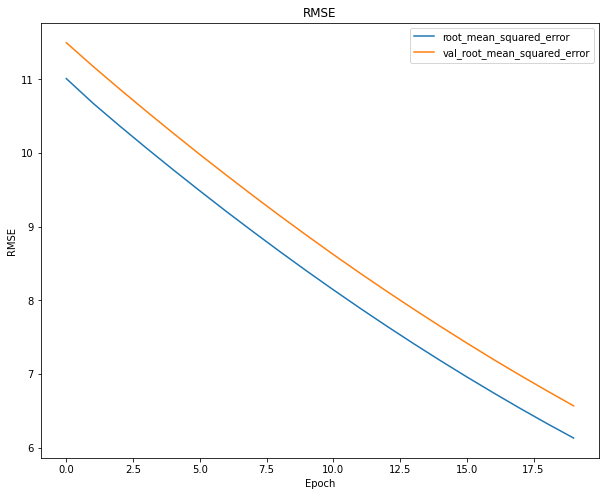

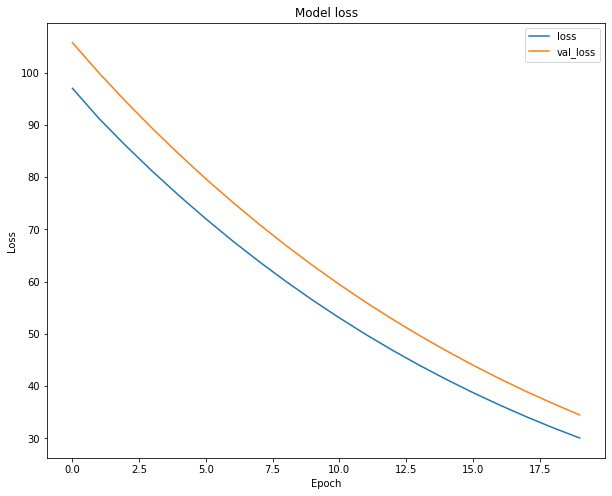

In [44]:
losses = pd.DataFrame(history.history)

losses[['root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(10,8), xlabel="Epoch", ylabel="RMSE", title="RMSE")
losses[['loss', 'val_loss']].plot(figsize=(10,8), xlabel="Epoch", ylabel="Loss", title="Model loss")

In [45]:
feedback_model.evaluate(window.test)

2/2 [==============================] - 0s 22ms/step - loss: 40.2889 - root_mean_squared_error: 7.0974


[40.28887939453125, 7.097373962402344]